# Part 2.5 | Merging Data

In [17]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-2-5/data/'

#### Nick, you'll have to log into Google Drive this way if you want to save your cleaned dataset. You wouldn't necessarily need to save it. But if you did, this lets you save your cleaned dataset to your Google Drive.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Once you've mounted Google Drive, you can save a dataset (ex. data) to you main Google Drive this way.
data.to_csv(drive_path + 'my_data.csv')

## Format The Data

In [18]:
vote = pd.read_csv(file_path + 'County-Presidential-Election-Returns-2000-2024.csv')
vote.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20250821,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20250821,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20250821,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20250821,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20250821,TOTAL


In [ ]:
vote = pd.read_csv(file_path + 'County-Presidential-Election-Returns-2000-2024.csv')
vote = vote[['county_fips', 'year', 'state', 'party', 'candidatevotes']]
vote = vote.dropna()
vote['county_fips'] = vote['county_fips'].astype(int).astype(str)
vote = vote[vote['party'].isin(['REPUBLICAN', 'DEMOCRAT'])]

In [ ]:
total = vote.groupby(['county_fips','year'])['candidatevotes'].sum()
dem = vote[vote['party'] == 'DEMOCRAT'].groupby(['county_fips','year'])['candidatevotes'].sum()

In [ ]:
share = (dem/total).reset_index().rename(columns={'candidatevotes': 'dem_share'})
share.to_csv(file_path + 'Democratic_Share_Presidential.csv')

In [ ]:
# Pivot year to columns
vote_wide = share.pivot(index='county_fips',
                    columns='year',
                    values='dem_share').reset_index()
vote_wide = vote_wide.rename(columns={2016: '2016', 2020: '2020', 2024: '2024'})
vote_wide.to_csv('data/Democratic_Share_Presidential_Wide.csv')

In [ ]:
income = pd.read_csv(file_path + 'SAIPE-Estimates-2023.csv')
income.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,"40,763,043","40,485,829","41,040,257",12.5,12.4,12.6,...,15.5,"77,719","77,533","77,905","3,027,969","2,977,590","3,078,348",16.8,16.5,17.1
1,1,0,AL,Alabama,"780,043","762,230","797,856",15.7,15.3,16.1,...,21.2,"62,248","61,546","62,950","66,457","61,943","70,971",23.2,21.6,24.8
2,1,1,AL,Autauga County,"7,004","5,599","8,409",11.7,9.3,14.1,...,21.2,"68,857","62,667","75,047",.,.,.,.,.,.
3,1,3,AL,Baldwin County,"24,942","20,972","28,912",10,8.4,11.6,...,16.1,"74,248","69,046","79,450",.,.,.,.,.,.
4,1,5,AL,Barbour County,"5,585","4,266","6,904",25.5,19.5,31.5,...,44.4,"45,298","40,531","50,065",.,.,.,.,.,.


In [ ]:
income = pd.read_csv(file_path + 'SAIPE-Estimates-2023.csv')
income['County FIPS Code'] = income['County FIPS Code'].astype(str).str.zfill(3)
income['State FIPS Code'] = income['State FIPS Code'].astype(str)
income['county_fips'] = income['State FIPS Code'] + income['County FIPS Code']
income['Median Household Income'] = pd.to_numeric(income['Median Household Income'].str.replace(',', ''), errors='coerce')
income.to_csv('data/Income_By_County.csv')


## Exercise

In [ ]:
income = pd.read_csv('data/Income_By_County.csv', index_col=0)
income = income[['county_fips', 'Name', 'Median Household Income']]
income.head()

,county_fips,Name,Median Household Income
0,0,United States,77719.0
1,1000,Alabama,62248.0
2,1001,Autauga County,68857.0
3,1003,Baldwin County,74248.0
4,1005,Barbour County,45298.0


In [ ]:
vote = pd.read_csv('data/Democratic_Share_Presidential_Wide.csv', index_col=0)
vote.head()

,county_fips,2000,2004,2008,2012,2016,2020,2024
0,10001,0.486228,0.430514,0.549570,0.525066,0.474126,0.520705,0.510175
1,10003,0.618743,0.610978,0.705544,0.672871,0.655757,0.688198,0.665395
2,10005,0.462080,0.390371,0.456708,0.434067,0.385829,0.443133,0.444505
3,1001,0.291822,0.238448,0.259321,0.268006,0.246225,0.274423,0.266411
4,1003,0.255099,0.227490,0.240351,0.218190,0.202078,0.227317,0.206524


In [ ]:
data = pd.merge(income, vote, on='county_fips')
data

,county_fips,Name,Median Household Income,2000,2004,2008,2012,2016,2020,2024
0,1001,Autauga County,68857.0,0.291822,0.238448,0.259321,0.268006,0.246225,0.274423,0.266411
1,1003,Baldwin County,74248.0,0.255099,0.227490,0.240351,0.218190,0.202078,0.227317,0.206524
2,1005,Barbour County,45298.0,0.504473,0.450284,0.492692,0.515791,0.471768,0.461391,0.425850
3,1007,Bibb County,56025.0,0.388085,0.276286,0.268543,0.264219,0.217603,0.208811,0.176151
4,1009,Blount County,64962.0,0.282079,0.184675,0.147296,0.125174,0.086188,0.096523,0.092231
...,...,...,...,...,...,...,...,...,...,...
3103,56037,Sweetwater County,76442.0,0.369396,0.328353,0.357400,0.294655,0.210010,0.238163,0.229290
3104,56039,Teton County,130156.0,0.424258,0.538212,0.620753,0.561196,0.651001,0.694059,0.679087
3105,56041,Uinta County,79086.0,0.231774,0.229863,0.286757,0.197501,0.163404,0.175085,0.176524
3106,56043,Washakie County,62794.0,0.204361,0.210851,0.260630,0.208508,0.154516,0.167094,0.173499


<Axes: xlabel='2016', ylabel='2024'>

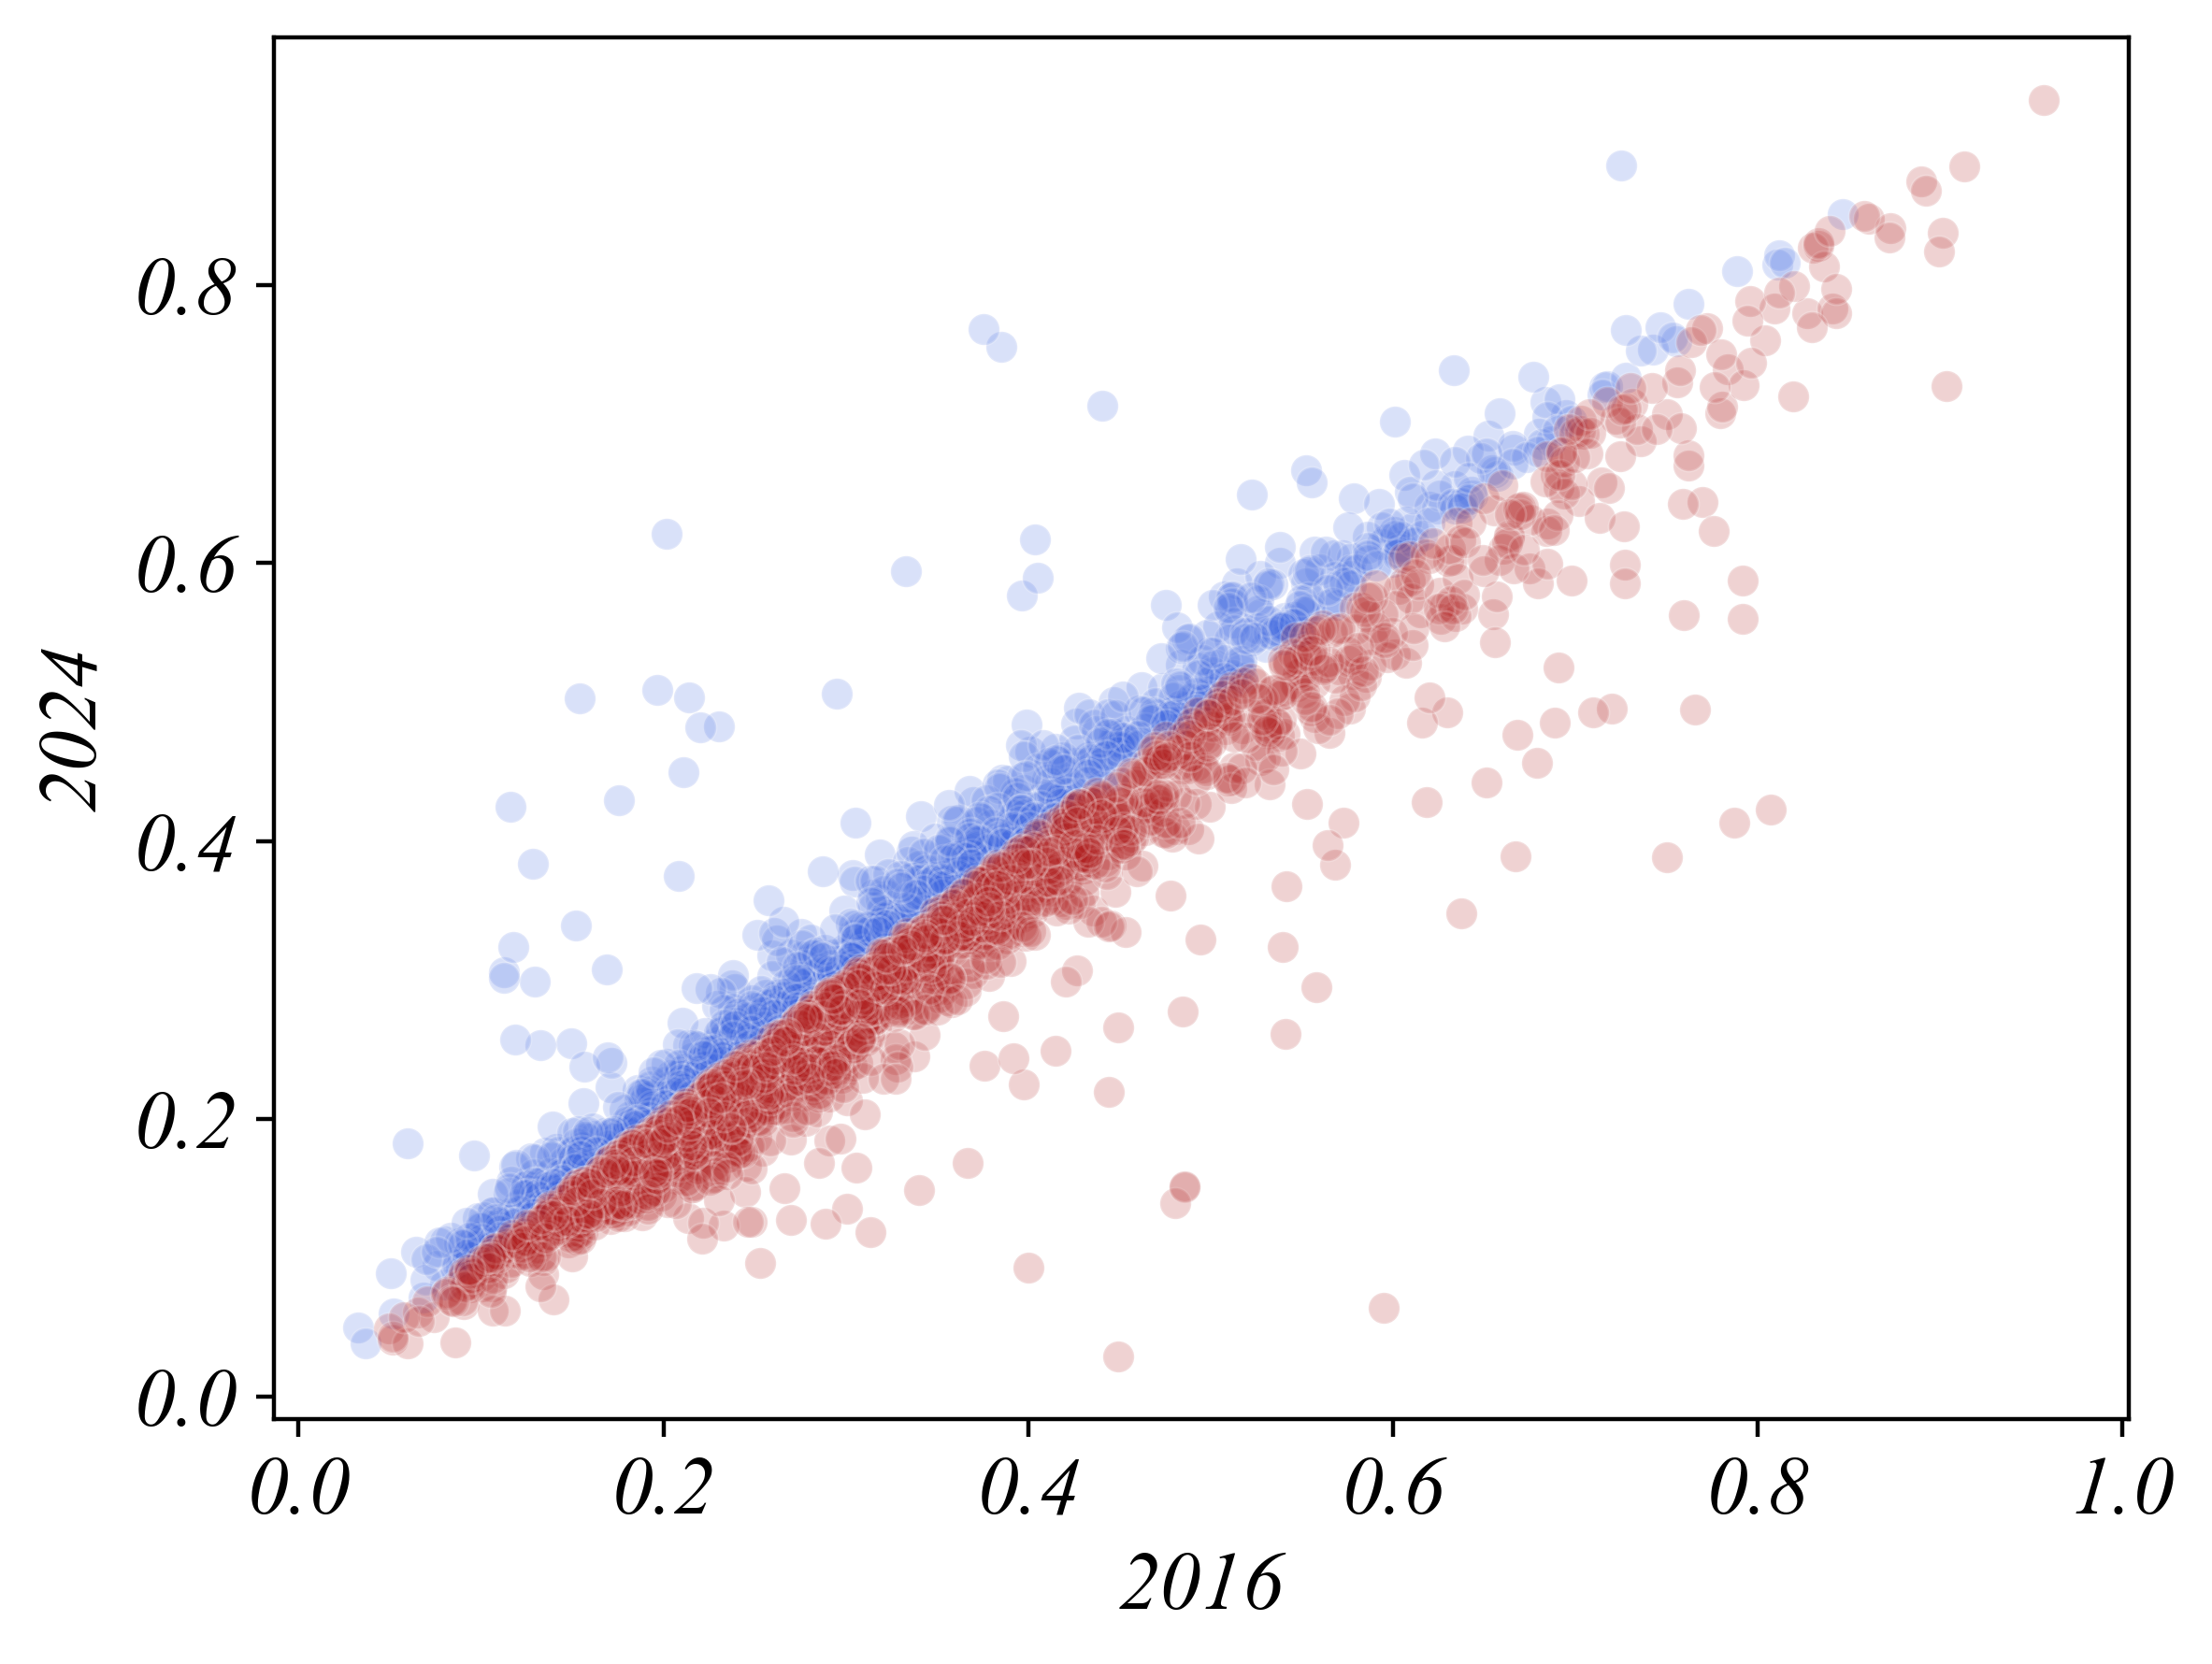

In [ ]:
data['shift_dem'] = data['2024'] - data['2016']
dem = data[data['shift_dem'] >= 0]
rep = data[data['shift_dem'] < 0]

sns.scatterplot(dem, y='2024', x='2016', alpha=0.2, color='royalblue')
sns.scatterplot(rep, y='2024', x='2016', alpha=0.2, color='firebrick')


<Axes: xlabel='Median Household Income', ylabel='shift_dem'>

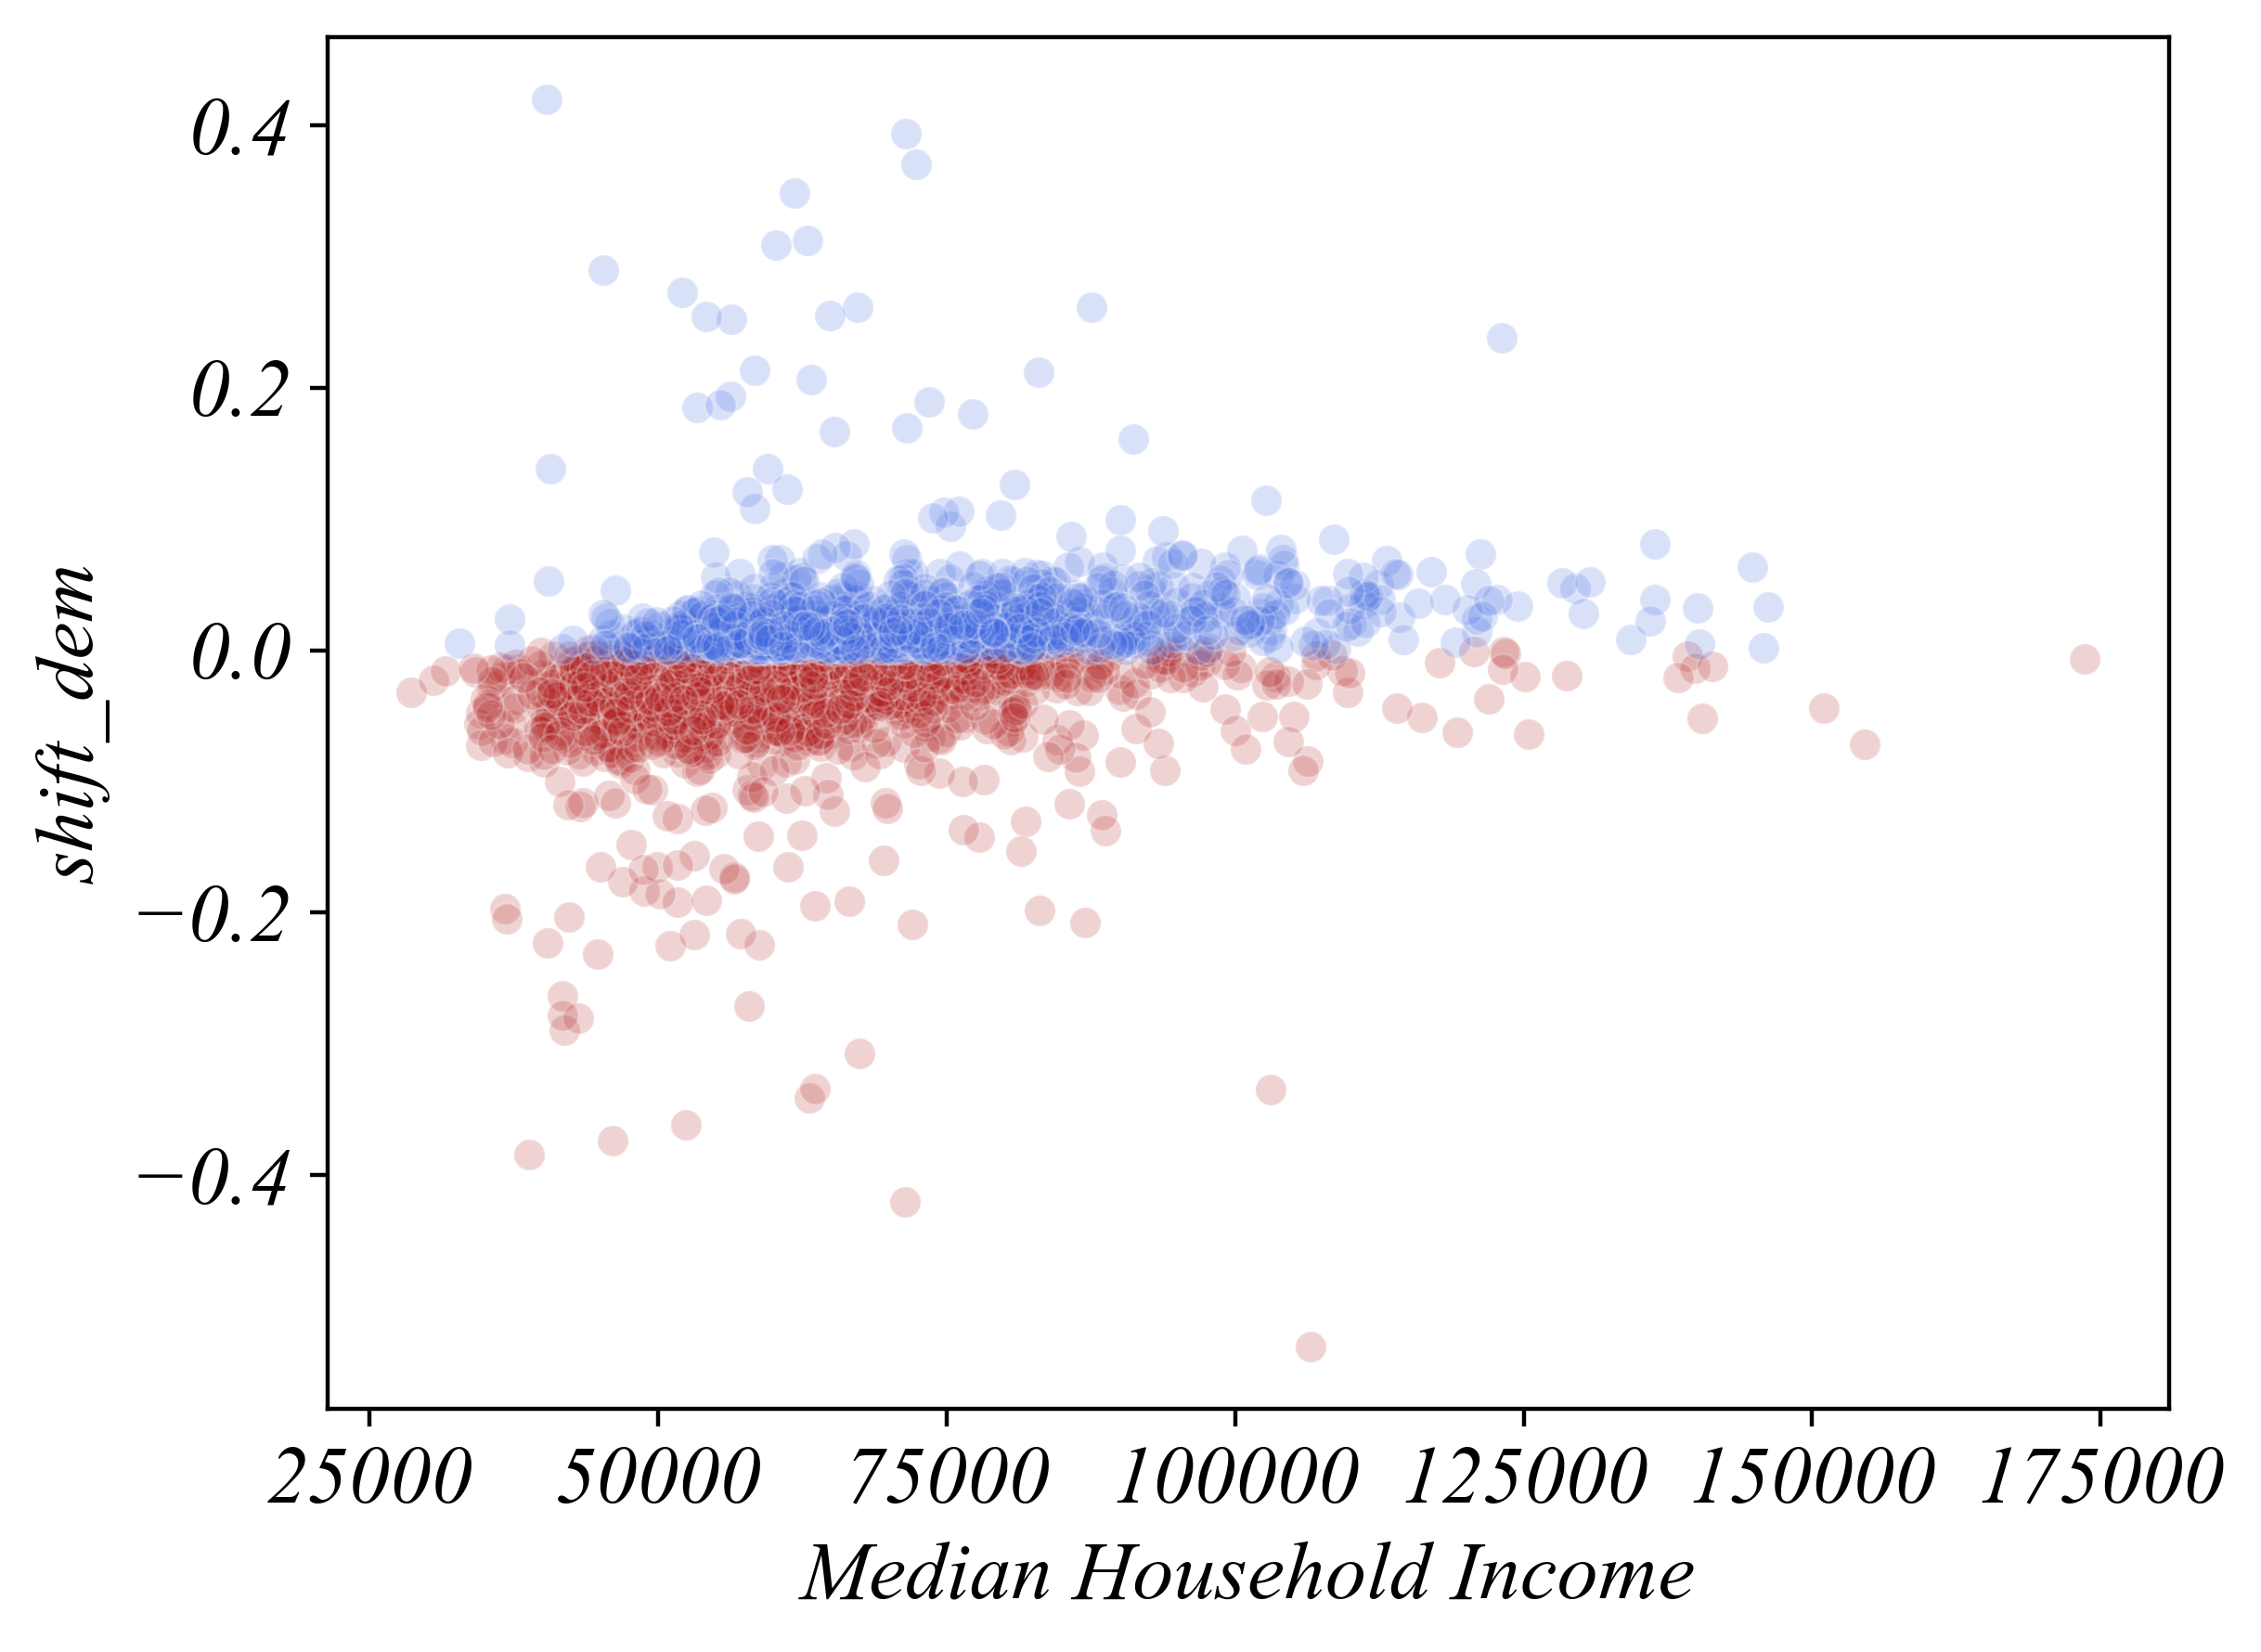

In [ ]:
data['shift_dem'] = data['2024'] - data['2016']
rep = data[data['shift_dem'] < 0]
dem = data[data['shift_dem'] >= 0]

sns.scatterplot(rep, x='Median Household Income', y='shift_dem', alpha=0.2, color='firebrick')
sns.scatterplot(dem, x='Median Household Income', y='shift_dem', alpha=0.2, color='royalblue')
